In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
def plot_image(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

In [8]:
y_train.shape

(50000, 1)

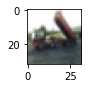

In [9]:
plot_image(2)

In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
classes[y_train[2][0]]

'truck'

In [12]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [13]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [14]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples
Epoch 1/50
 3392/50000 [=>............................] - ETA: 1:12 - loss: 2.2019 - acc: 0.1813